<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis(PCA, 주성분 분석)



주성분 분석은 차원축소를 위해 사용됨 -> 고차원의 데이터를 저차원의 데이터로 변환

목적
차원(dimension)을 감소시켜 해석을 용이하게 하고, 시각화에 도움
기대효과
통계 : 적은 수의 특성으로 특정 현상을 설명
머신러닝 : 모델 성능 강화


개념

여러개의 양적 변수들 사이의 분선-공분산 관계를 이용하여, 변수들의 선형결합으로 표시되는 주성분을 찾음(축의 개념)
2-3개의 주성분으로 전체 분산(variance)의 대부분을 설명하고자 하는 다변량 분석법
원 데이터의 손실을 최소화하면서 데이터를 잘 설명할 수 있는 변수들의 선형 조합을 찾는 것이 목표

- 라면 데이터를 이용한 PCA() 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면','떡라면','짬뽕라면','만두라면','치즈라면','된장라면','볶음라면','김치라면'],
             'noodle':[2,1,5,2,3,4,4,1,3,5],
             'bowl':[4,5,3,2,5,3,4,2,3,5],
             'soup':[5,1,4,3,5,2,3,1,2,3]})
lamen


{'bowl': [4, 5, 3, 2, 5, 3, 4, 2, 3, 5],
 'name': ['쇠고기라면',
  '해물라면',
  '얼큰라면',
  '떡라면',
  '짬뽕라면',
  '만두라면',
  '치즈라면',
  '된장라면',
  '볶음라면',
  '김치라면'],
 'noodle': [2, 1, 5, 2, 3, 4, 4, 1, 3, 5],
 'soup': [5, 1, 4, 3, 5, 2, 3, 1, 2, 3]}

In [3]:
lamen1 = pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


- 데이터 프레임으로 변경하면 위와 같은 표가 나오게 된다. (면, 그릇, 국물에 대한 수치)

In [4]:
# 1. 데이터 분리
lamenEval = lamen1[['noodle','bowl','soup']]
lamenName = lamen1['name']

In [5]:
# 2. 스케일러로 값 변환
# scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape

(10, 3)

In [6]:
# 3. PCA 모델링
# - PCA.fit() : 주성분 찾음
# - PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modelling 
from sklearn.decomposition import PCA

pca_lamen = PCA()
pca_lamen.fit(lamen_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# data transform
X_pca_lamen = pca_lamen.transform(lamen_scaled)

# look into data shape
print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data : {}".format(str(X_pca_lamen.shape)))

original data : (10, 3)
transform data : (10, 3)


In [8]:
pca_lamen.components_

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

- PCA 모델에 의해 산출된 값을 보면 --> pca_lamen.components_

- 첫 행부터 각 pc1, pc2, pc3 을 의미하며, 열은 각각 noodle, bowl, soup를 의미함



- 산출한 특성별 주성분 요소 값과 특성들의 평가 스코어를 이용하여, 역산을 해보고 PCA 모델링을 통해 변환된 최종 데이터와 일치하는지 확인해보세요

In [9]:
# PCA 1,2,3 에 대한 변환 스코어
pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
    pc1 += pca_lamen.components_[0][j] * lamen_scaled[:,j] # 계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
    pc2 += pca_lamen.components_[1][j] * lamen_scaled[:,j]
    pc3 += pca_lamen.components_[2][j] * lamen_scaled[:,j]
    
pc1 = pc1.reshape(10,1)
pc2 = pc2.reshape(10,1)
pc3 = pc3.reshape(10,1)

np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_lamen,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

- 결과가 모두 True로 pca_lamen.components_의 값들과 스케일링 된 lamen_scaled 데이터와 곱하고 더하면 PCA의 결과인 X_pca_lamen 과 데이터가 같은 것을 확인할 수 있다.

In [13]:
def biplot2(score, coeff, label, pcax, pcay, labels = None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley), ha='right')
        
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color='r', alpha=1)
        if labels is None:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha = 'center', va='center')
        else:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, labels[i], color='g', ha='center', va='center', size=15)
    plt.xlim(-0.8, 0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
   

In [15]:
# #한글폰트 설정
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# font_path="C:\\Windows\\Fonts\\malgun.ttf"
# font_name=fm.FontProperties(fname=font_path).get_name()
# plt.rcParams['font.family']=font_name


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49632 missing from current font.
  font.set_

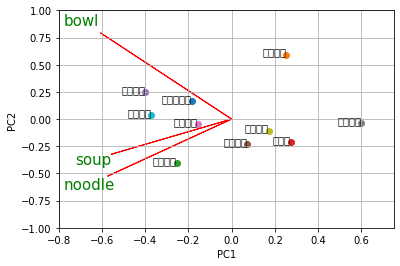

In [14]:
 biplot2(X_pca_lamen, pca_lamen.components_, lamenName, 1,2,labels=lamenEval.columns)

- 그래프 해석

면과 국물의 축이 가까우므로, 둘 사이에 비교적 강한 양의 상관관계가 있다

그릇은 나머지 변수와 비교적 상관관계가 적다(같은 방향 : 약한 양의 상관관계)

얼큰라면은 나머지 변수에 비해 면에서 높은 점수를 받았다

짬뽕라면과 김치라면은 전체적으로 점수가 높을 것이며, 짬뽕라면은 그릇의 점수도 높을 것이다

해물라면은 면, 국물과 반대방향이므로 음의 상관관계가 있다. 반면, 그릇의 점수는 상당히 높을 것

된장라면은 그릇의 점수가 낮을 것이며, 면과 국물의 점수 역시 낮을 것이다.

볶음, 만두, 떡은 전체적으로 점수가 고르며, 큰 특성을 보이지 않을 것